# Washington State Housing Price Prediction

**Student Name: Preston Went**  
**SID: 1538588**  
**Course: DATASCI 410**  
**Milestone M04: Final Project**

My team has been provided by a client with a set of housing sales data. I have been assigned the task of exploring this dataset with the goal of making a model to help predict housing sale prices. Having completed basic exploration and identified a set of features that have statistically-significant relationships with price, I built a basic linear and Naive Bayes model with mixed success. Now I will use what I learned during this to create better predictive models.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Necessary-Libraries" data-toc-modified-id="Importing-Necessary-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Necessary Libraries</a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the Data</a></span></li><li><span><a href="#Summary-Statistics-and-Correlations" data-toc-modified-id="Summary-Statistics-and-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary Statistics and Correlations</a></span></li><li><span><a href="#Summary-of-Previous-Work" data-toc-modified-id="Summary-of-Previous-Work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary of Previous Work</a></span><ul class="toc-item"><li><span><a href="#House-Size-Matters" data-toc-modified-id="House-Size-Matters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>House Size Matters</a></span></li><li><span><a href="#Location,-Location,-Location" data-toc-modified-id="Location,-Location,-Location-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Location, Location, Location</a></span></li><li><span><a href="#Grade-Matters" data-toc-modified-id="Grade-Matters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Grade Matters</a></span></li><li><span><a href="#Linear-Model-for-Housing-Price" data-toc-modified-id="Linear-Model-for-Housing-Price-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Linear Model for Housing Price</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Naive Bayes</a></span></li></ul></li><li><span><a href="#Making-Predictive-Models" data-toc-modified-id="Making-Predictive-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Making Predictive Models</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-Data" data-toc-modified-id="Splitting-the-Data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Splitting the Data</a></span></li><li><span><a href="#Engineering-Features" data-toc-modified-id="Engineering-Features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Engineering Features</a></span><ul class="toc-item"><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>k-Nearest Neighbors</a></span></li></ul></li><li><span><a href="#Defining-and-Training-the-Models" data-toc-modified-id="Defining-and-Training-the-Models-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Defining and Training the Models</a></span><ul class="toc-item"><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>k-Nearest Neighbors</a></span></li></ul></li><li><span><a href="#Getting-Predictions" data-toc-modified-id="Getting-Predictions-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Getting Predictions</a></span></li><li><span><a href="#Evaluating-Model-Performance" data-toc-modified-id="Evaluating-Model-Performance-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Evaluating Model Performance</a></span><ul class="toc-item"><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>k-Nearest Neighbors</a></span></li></ul></li><li><span><a href="#Comparing-Models" data-toc-modified-id="Comparing-Models-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Comparing Models</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Importing Necessary Libraries

As always, let's start by importing the necessary libraries.

In [1]:
# Load necessary libraries

# Data manipulation
import pandas as pd
import numpy as np
from patsy import dmatrix
from sklearn.preprocessing import (OrdinalEncoder, RobustScaler)
from sklearn.model_selection import train_test_split

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set();
from statsmodels.graphics.gofplots import (ProbPlot, qqplot, qqline)

# Modelling
import scipy.stats as sps
import statsmodels.formula.api as smod
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Metrics
from sklearn.metrics import (confusion_matrix, classification_report, 
                             r2_score, median_absolute_error)

# Define our random seed
RAND_SEED = 5743829
np.random.RandomState(RAND_SEED);

## Loading the Data

I have elected to use the pre-extracted dataset provided for milestone M01. This notebook assumes that it is in the same folder as the dataset, and that it is called "kc_house_data.csv". Each row contains information on a single housing sale. The dataset has 21 features:

1. id: A unique numeric id for the sale.
2. date: The date of the sale.
3. price: The amount the house sold for.
4. bedrooms: The number of bedrooms in the house.
5. bathrooms: The number of bathrooms in the house.
6. sqft_living: The area of the living space in square feet.
7. sqft_lot: The area of the lot the house is on in square feet.
8. floors: The number of floors the house has.
9. waterfront: Whether or not the house was on the waterfront.
10. view: A numeric rating of the quality of the view from the house.
11. condition: A numeric rating of the condition of the house.
12. grade: A numeric rating for the overall construction and design quality of the house.
13. sqft_above: The area of the living space above ground level in square feet.
14. sqft_basement: The area of the living space below ground level in square feet.
15. yr_built: The year the house was built.
16. yr_renovated: The year the house was last renovated.
17. zipcode: The zipcode the house is situated in.
18. lat: The latitude of the house.
19. long: The longitude of the house.
20. sqft_living15: The median square footage of the living space of the 15 nearest geographical neighbors of the house in square feet.
21. sqft_lot15: The median square footage of the lots the 15 nearest geographical neighbors of the house are on in square feet.

This generally means that we have four types of features:

1. Our unique housing sale identifier: id.
2. Our target feature: price.
3. Property features: date, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, sqft_above, sqft_basement, yr_built, and yr_renovated.
4. Context features: waterfront, view, zipcode, lat, long, sqft_living15, and sqft_lot15.

In [2]:
# Load the data
filename = 'kc_house_data.csv'
houses_df = pd.read_csv(filename)

## Summary Statistics and Correlations

As always, we start by looking at some summary statistics for each feature.

In [3]:
houses_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.00,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.110000e+00,7.700000e-01,0.00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184400e+02,290.00,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.00,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


We can immediately see a few things:

1. There is at least one major outlier in bedrooms, with 33 bedrooms.
2. There is at least one major outlier in bathrooms, with 8 bathrooms. This may be the same house as in 1.
3. sqft_lot is probably skewed leftward with a long tail. The mean is larger than the third quantile.
4. Most houses sold were not on the waterfront.
5. The majority of houses sold had a terrible view. At least three-quarters had a view rating of zero.
6. Most houses sold were built before 1997.
7. More than three-quarters of houses sold have never been renovated.

We can also look at the correlations between each variable. Our correlation coefficient of choice is Kendall's tau correlation coefficient. It is not parametric, and tends to be a bit more conservative than Spearman's rho correlation coefficient. If it finds anything, that's a good sign that we should take a look.

Bear in mind that we can make sense of correlation in the case of ordinal categorical variables - like view or grade - even though they are categorical. Kendall's tau and Spearman's rho are particularly useful for this due to being nonparametric.

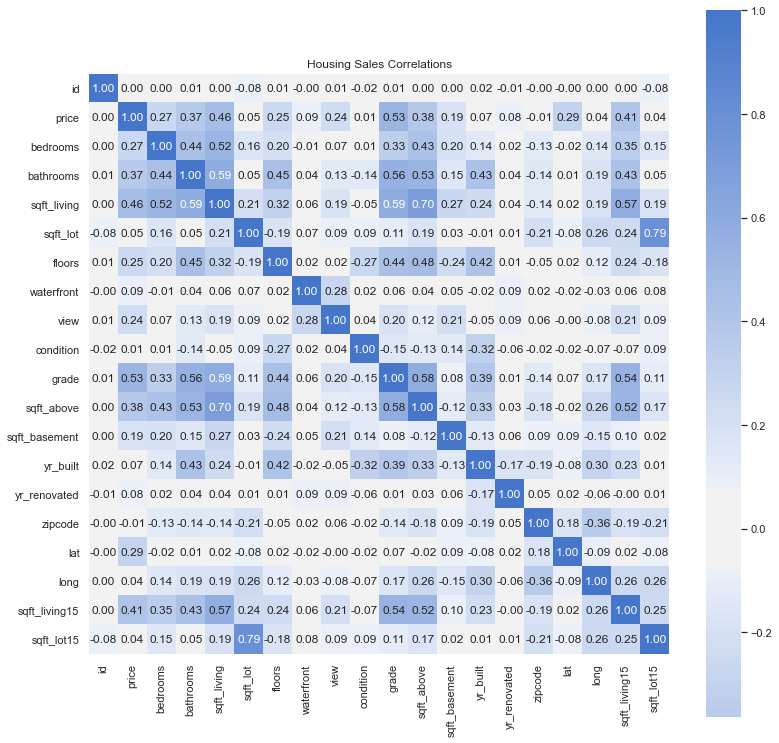

In [4]:
ax = plt.figure(figsize = (13, 13)).gca() # Define axis

# Grab and plot the correlation coefficients
cmap = sns.diverging_palette(255, 255, sep = 20, as_cmap = True)
sns.heatmap(data = houses_df.corr(method = 'kendall'), 
            annot = True, fmt = '.2f',
            square = True, 
            cmap = cmap, center = 0, 
            ax = ax)
ax.set_title('Housing Sales Correlations');

The features that correlate most strongly with price are grade, sqft_living, and sqft_living15. The correlations are not particularly strong there, so any model we eventually make will have to utilize several other variables as well.

We see some expected, unexpected, and spurious correlations:
* Expected: sqft_lot and sqft_lot15, sqft_living and sqft_above
* Unexpected: yr_built and condition... really most of the stronger correlations with yr_built, price and sqft_lot
* Spurious: long and zipcode

This is a wealth of information, but we will remain focused on price here.

## Summary of Previous Work

We explored this dataset in milestone M01, and came to three primary conclusions:
1. House Size Matters: The size of a house is a fairly good indicator of its price. The size of a houses neighbors is also, if possibly only because neighboring houses tend to be of a similar size.
2. Location, Location, Location: The location of a house - be it encoded in zipcode, latitude and longitude, or by whether or not it is on a waterfront - is a strong indicator of the price of that house. Whatever predictor we decide to make should use location as a primary factor.
3. Grade Matters: Grade is an important factor in the price of a house. It encapsulates a large amount of information.

In milestone M02, we selected the features that best encoded house size, location, and grade. We then identified distributions that could be used to approximate these features, and used classical and Bayesian techniques to test their impact on price for significance. The results were as follows:
1. House Size: Best represented by sqft_living. Nearly log-normally distributed. After performing a quantile binning into ten equal bins, the bin number was found to have a significant impact on price at the 95% confidence level.
2. Location: Best represented by zipcode. Multinomially distributed. The differences in price between any two zipcodes were significant at the 95% confidence level about 86% of the time.
3. Grade: Best represented by grade. Multinomially distributed. The differences in price between any two grades were significant at the 95% confidence level about 94% of the time.

In milestone M03, we then built a linear model using the features selected above. It explained 93% of the variance of the data, but had issues with particularly large outlier residuals.

In assignment L09, we built a Naive Bayes classifier for price bins, with little success. The performance was substantially better than random guesswork, but little more could be said for it. The problem at hand is naturally phrased as a regression problem, and this result suggests that we should treat it as one.

In [5]:
def class_bootstrap_mean(data, n, alpha):
    # Bootstrap the mean with classical methods and compute a confidence interval
    # Inputs: data - the data to be sampled
    #         n - the number of times to sample that data
    #         alpha - percent of the distribution in confidence interval
    # Outputs: mean - the mean as calculated
    #          ci_low - the calculated cutoff of the lower quantile
    #          ci_high - the calculated cutoff of the higher quantile
    means = pd.Series([data.sample(frac = 1, replace = True).mean() for i in range(n)])
    mean = means.mean()
    ci_low = means.quantile(q = (1 - alpha) / 2)
    ci_high = means.quantile(q = (1 + alpha) / 2)
    return mean, ci_low, ci_high

### House Size Matters

The size of a house looks to be an important factor in determining its price. Below is a hexbin plot showing this relationship, made after removing outliers from the dataset.

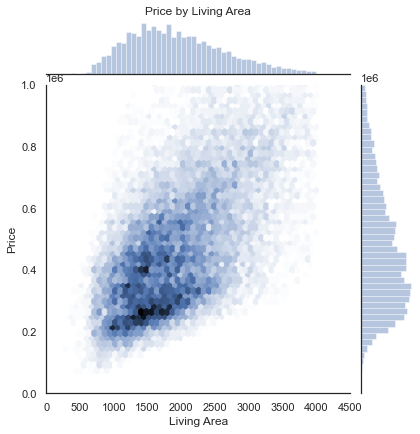

In [6]:
# Create and print figure
sns.set(style = 'white', color_codes = True)
plot = sns.jointplot(data = houses_df.loc[(houses_df.price < 1e6) & 
                                          (houses_df.sqft_living < 4000)], 
                     x = 'sqft_living', 
                     y = 'price', 
                     kind = 'hex')
plot.ax_marg_x.set_xlim(0, 4500)
plot.ax_marg_y.set_ylim(0, 1e6)
plot.ax_marg_x.set_title('Price by Living Area')
plot.ax_joint.set_xlabel('Living Area')
plot.ax_joint.set_ylabel('Price');

Note that the data, while spread out, has a general upward trend. The large spread is likely due to other factors - like the location of the house.

Here is the sample distribution of living area.

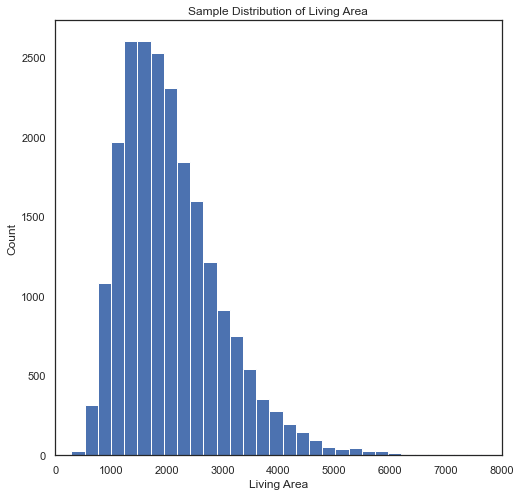

In [7]:
sns.set(style = 'white', color_codes = True)
ax = plt.figure(figsize = (8, 8)).gca() # Define axis

# Make and display the figure
plt.hist(x = houses_df['sqft_living'], bins = 'rice')
ax.set_title('Sample Distribution of Living Area')
ax.set_xlim([0, 8000])
ax.set_xlabel('Living Area')
ax.set_ylabel('Count');

And we can make a quantile-quantile plot to show that this is well-approximated by a log-normal distribution.

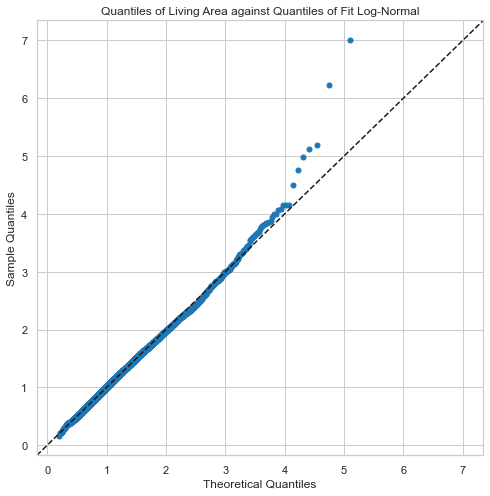

In [8]:
sns.set(style = 'whitegrid', color_codes = False)
ax = plt.figure(figsize = (8, 8)).gca() # Define axis

# Fit the distribution, then make and display the figure
pp = ProbPlot(data = houses_df['sqft_living'], dist = sps.lognorm, fit = True)
qq = pp.qqplot(marker = '.', markersize = 10, 
          markerfacecolor = 'tab:blue', markeredgecolor = 'tab:blue', 
          ax = ax)
qqline(qq.axes[0], line = '45', fmt = 'k--')
ax.set_title('Quantiles of Living Area against Quantiles of Fit Log-Normal');

We can also bin living area to make it easier to test for significance. We do so here by cutting it into ten equal quantiles.

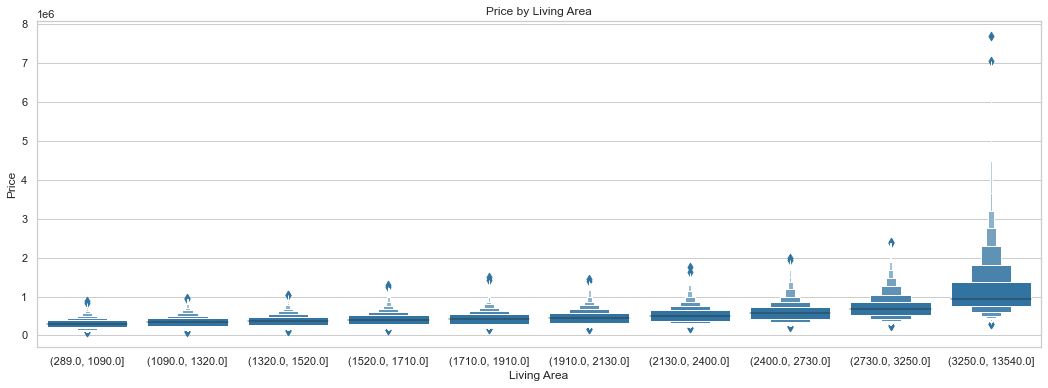

In [9]:
# Cut sqft_living into ten groups
houses_df['sqft_living_bin'] = pd.qcut(x = houses_df['sqft_living'], q = 10, 
                                       precision = 0)
price_by_bin = houses_df.groupby('sqft_living_bin')['price']

sns.set(style = 'whitegrid', color_codes = False)
ax = plt.figure(figsize = (18, 6)).gca() # Define axis

# Create and print figure
clrs = ['tab:blue']
sns.boxenplot(data = houses_df, 
              x = 'sqft_living_bin', 
              y = 'price', 
              palette = clrs, 
              ax = ax)
ax.set_title('Price by Living Area')
ax.set_xlabel('Living Area')
ax.set_ylabel('Price');

This done, we can test the differences in price between these bins for significance. We are testing 45 null hypotheses - one for each pair of bins. For each such bin pair, the null hypothesis is that the mean price for the two bins is the same. Our alpha is 0.05, which is then Bonferroni-corrected to account for the large number of hypotheses. We test these hypotheses by using the classical bootstrap.

In [10]:
# Define alpha and apply the Bonferroni correction
alpha = 0.05
num_hyp = len(price_by_bin) * (len(price_by_bin) - 1) / 2
corr_alpha = alpha / num_hyp

# Perform the bootstrap
results = price_by_bin.apply(lambda x: class_bootstrap_mean(x, 1000, 1 - corr_alpha))

# Print results
for i in range(len(results)):
    print('Bin: {}, '.format(results.index[i]) + 
          'Mean: {:.3}, '.format(results[i][0]) + 
          'CI Low: {:.3}, '.format(results[i][1]) + 
          'CI High: {:.3}'.format(results[i][2]))

Bin: (289.0, 1090.0], Mean: 3.06e+05, CI Low: 2.98e+05, CI High: 3.15e+05
Bin: (1090.0, 1320.0], Mean: 3.56e+05, CI Low: 3.46e+05, CI High: 3.66e+05
Bin: (1320.0, 1520.0], Mean: 3.82e+05, CI Low: 3.73e+05, CI High: 3.91e+05
Bin: (1520.0, 1710.0], Mean: 4.23e+05, CI Low: 4.13e+05, CI High: 4.35e+05
Bin: (1710.0, 1910.0], Mean: 4.37e+05, CI Low: 4.27e+05, CI High: 4.48e+05
Bin: (1910.0, 2130.0], Mean: 4.78e+05, CI Low: 4.67e+05, CI High: 4.92e+05
Bin: (2130.0, 2400.0], Mean: 5.34e+05, CI Low: 5.21e+05, CI High: 5.47e+05
Bin: (2400.0, 2730.0], Mean: 6.06e+05, CI Low: 5.89e+05, CI High: 6.22e+05
Bin: (2730.0, 3250.0], Mean: 7.31e+05, CI Low: 7.1e+05, CI High: 7.51e+05
Bin: (3250.0, 13540.0], Mean: 1.15e+06, CI Low: 1.11e+06, CI High: 1.19e+06


We see that none of the estimated means for the bins are contained in the confidence intervals of the any other bin. Thus, we reject all 45 null hypotheses, and accept that the mean price in each of these bins is distinct from the others.

### Location, Location, Location

The location of a house appears to be important in determining it's price. Below is a scatter plot over latitude and longitude showing this relationship.

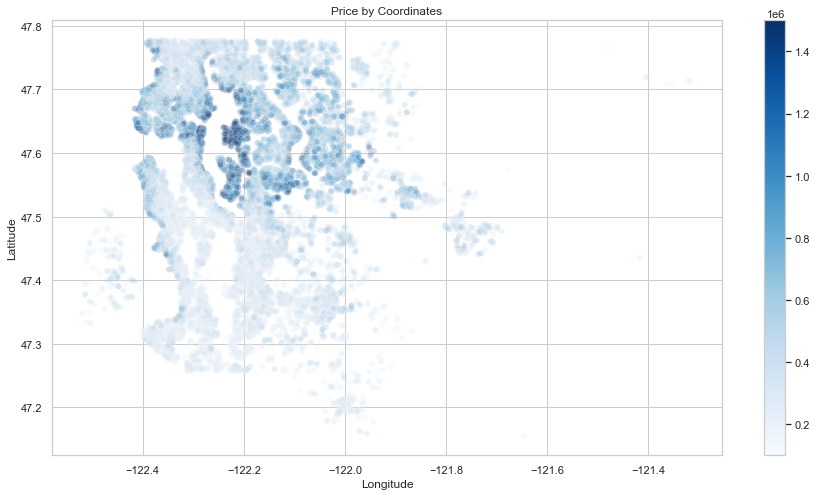

In [11]:
sns.set(style = 'whitegrid', color_codes = False)
ax = plt.figure(figsize = (15, 8)).gca() # Define axis.

# Create and print figure
norm = plt.Normalize(1e5, 1.5e6)
sm = plt.cm.ScalarMappable(norm = norm, cmap = 'Blues')
sns.scatterplot(data = houses_df, x = 'long', y = 'lat',
                hue = 'price', hue_norm = norm, alpha = 0.15, palette = 'Blues', 
                ax = ax)
ax.get_legend().remove()
ax.figure.colorbar(sm)
ax.set_title('Price by Coordinates')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude');

We can clearly see that some locations tend to have higher housing prices than others, and that houses on the waterfront tend to be more expensive than those that are landlocked.

This information is most simply encoded in zipcode. Here is the distribution of zipcode.

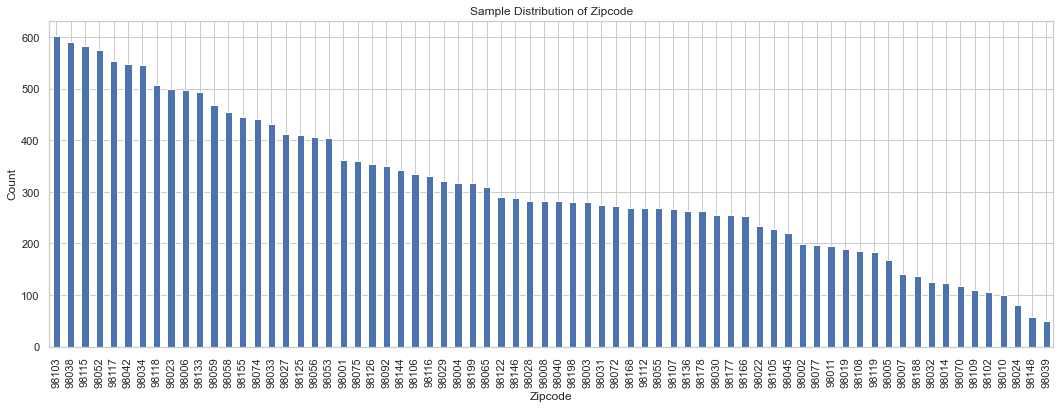

In [12]:
sns.set(style = 'whitegrid', color_codes = False)
ax = plt.figure(figsize = (18, 6)).gca() # Define axis

# Make and display the figure
houses_df['zipcode'].value_counts().plot(kind = 'bar')
ax.set_title('Sample Distribution of Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Count');

zipcode follows a multinomial distribution - the parameters of which we can calculate exactly if need be.

We can test the impact of zipcode on price for significance in a manner similar to how we tested living area for significance. In this case, however, there are many more null hypotheses - 2415, one for each possible unique pairing of zipcodes. Each null hypothesis is that the mean of price one zipcode is identical to the mean of the other. Our alpha is 0.05, which is then Bonferroni-corrected to account for the large number of hypotheses. We test these hypotheses by using the classical bootstrap.

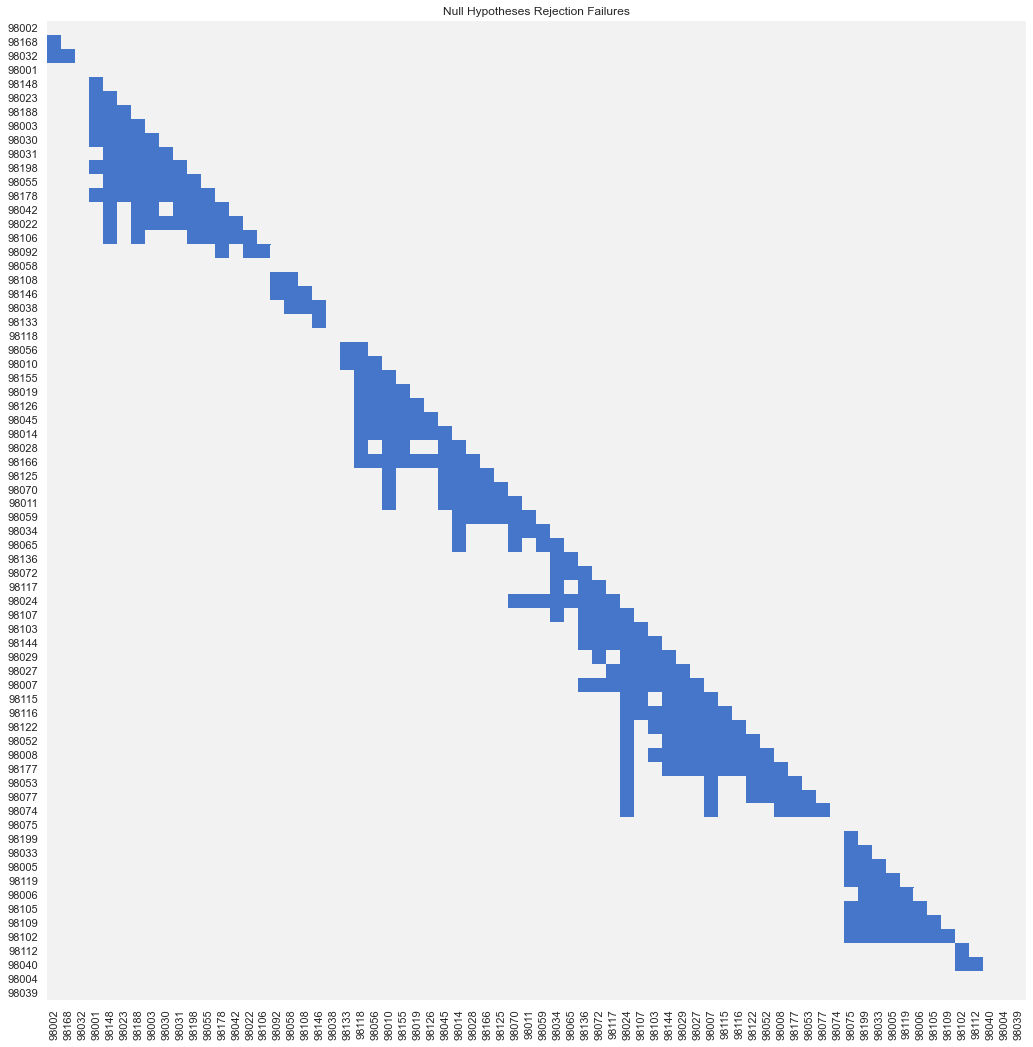

In [13]:
houses_df['zipcode'] = houses_df['zipcode'].astype(object)
price_by_zipcode = houses_df.groupby('zipcode')['price']

# Define alpha and apply the Bonferroni correction
alpha = 0.05
num_hyp = len(price_by_zipcode) * (len(price_by_zipcode) - 1) / 2
corr_alpha = alpha / num_hyp

# Perform classical bootstrap
results = price_by_zipcode.apply(lambda x: class_bootstrap_mean(x, 1000, 1 - corr_alpha))

# Get a more useful representation of the results
results_df = pd.DataFrame(columns = ['zipcode', 'mean', 'ci_low', 'ci_high'])
for i in range(len(results)):
    result = results.iloc[i]
    results_df = results_df.append({'zipcode': results.index[i], 
                                    'mean': result[0], 
                                    'ci_low': result[1], 
                                    'ci_high': result[2]}, 
                                   ignore_index = True)
results_df = results_df.set_index(keys = 'zipcode')
results_df = results_df.sort_values(by = 'mean')

# Create hypothesis test result set
hyp_map = [[1 if ((results_df.iloc[i][1] < results_df.iloc[j][0] and 
                   results_df.iloc[i][2] > results_df.iloc[j][0]) or 
                  (results_df.iloc[j][1] < results_df.iloc[i][0] and 
                   results_df.iloc[j][2] > results_df.iloc[i][0])) else 0
            for i in range(len(results))]
           for j in range(len(results))]
hyp_map = np.array(hyp_map)
hyp_map = np.tril(m = hyp_map, k = -1)

ax = plt.figure(figsize = (18, 18)).gca() # Define axis.

# Create and print figure
cmap = sns.diverging_palette(255, 255, sep = 20, as_cmap = True)
sns.heatmap(data = hyp_map, 
            annot = False, 
            square = True, 
            cmap = cmap, center = 0, cbar = False, 
            ax = ax, 
            xticklabels = results_df.index.astype(int), 
            yticklabels = results_df.index.astype(int))
ax.set_title('Null Hypotheses Rejection Failures');

We do not reject all of our null hypotheses. The failure rate is easily calculated.

In [14]:
round(np.sum(hyp_map) / num_hyp, 2)

0.13

We fail to reject the null hypothesis in about 14% of cases. This suggests that zipcode is a useful feature for estimating price.

### Grade Matters

Grade correlates strongly with price, and appears to be an important factor in determining it. Below is a boxen plot showing this relationship.

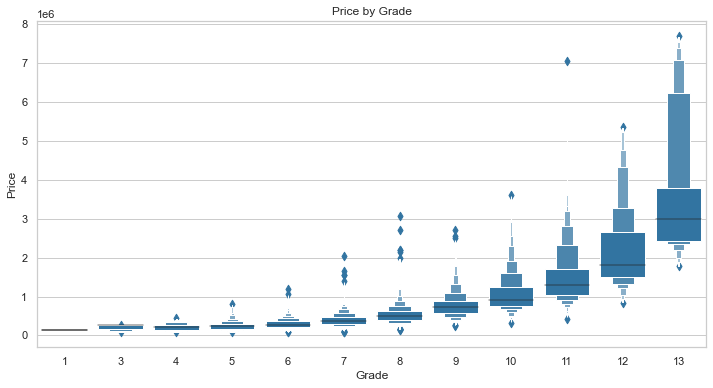

In [15]:
sns.set(style = 'whitegrid', color_codes = False)
ax = plt.figure(figsize = (12, 6)).gca() # Define axis.

# Create and print figure.
clrs = ['tab:blue']
sns.boxenplot(data = houses_df, 
              x = 'grade', 
              y = 'price', 
              palette = clrs, 
              ax = ax)
ax.set_title('Price by Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Price');

We can see that price generally increases with grade.

Let's check out the distribution of grade.

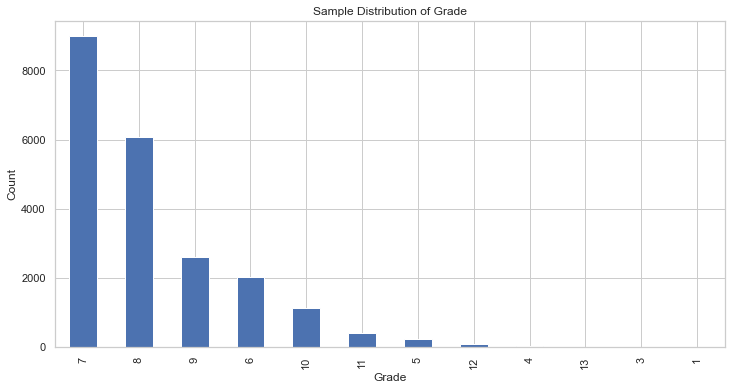

In [16]:
sns.set(style = 'whitegrid', color_codes = False)
ax = plt.figure(figsize = (12, 6)).gca() # Define axis

# Make and display the figure
houses_df['grade'].value_counts().plot(kind = 'bar')
ax.set_title('Sample Distribution of Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Count');

Grade is distributed multinomially, as zipcode was.

Thankfully, grade has fewer values than zipcode, so testing its impact on price for significance is easier. There are only 66 hull hypotheses to test - one for each possible unique pairing of grades. Each null hypothesis is that the mean price of one grade is identical to the mean of the other. Our alpha is 0.05, which is then Bonferroni-corrected to account for the large number of hypotheses. We test these hypotheses, again, by using the classical bootstrap.

In [17]:
price_by_grade = houses_df.groupby('grade')['price']

# Define alpha and apply the Bonferroni correction
alpha = 0.05
num_hyp = len(price_by_bin) * (len(price_by_bin) - 1) / 2
corr_alpha = alpha / num_hyp

# Perform the bootstrap
results = price_by_grade.apply(lambda x: class_bootstrap_mean(x, 1000, 1 - corr_alpha))

# Print results
for i in range(len(results)):
    result = results.iloc[i]
    print('Grade: {}, '.format(results.index[i]) + 
          'Mean: {:.3}, '.format(result[0]) + 
          'CI Low: {:.3}, '.format(result[1]) + 
          'CI High: {:.3}'.format(result[2]))

Grade: 1, Mean: 1.42e+05, CI Low: 1.42e+05, CI High: 1.42e+05
Grade: 3, Mean: 2.06e+05, CI Low: 7.5e+04, CI High: 2.8e+05
Grade: 4, Mean: 2.15e+05, CI Low: 1.63e+05, CI High: 2.72e+05
Grade: 5, Mean: 2.49e+05, CI Low: 2.26e+05, CI High: 2.72e+05
Grade: 6, Mean: 3.02e+05, CI Low: 2.93e+05, CI High: 3.12e+05
Grade: 7, Mean: 4.03e+05, CI Low: 3.98e+05, CI High: 4.08e+05
Grade: 8, Mean: 5.43e+05, CI Low: 5.35e+05, CI High: 5.51e+05
Grade: 9, Mean: 7.74e+05, CI Low: 7.52e+05, CI High: 7.93e+05
Grade: 10, Mean: 1.07e+06, CI Low: 1.03e+06, CI High: 1.12e+06
Grade: 11, Mean: 1.5e+06, CI Low: 1.39e+06, CI High: 1.61e+06
Grade: 12, Mean: 2.2e+06, CI Low: 1.87e+06, CI High: 2.55e+06
Grade: 13, Mean: 3.71e+06, CI Low: 2.39e+06, CI High: 5.34e+06


We fail to reject the null hypothesis for the grade pairings 1-3, 3-4, 3-5, and 4-5, and reject it in all other cases. We are thus failing to reject the null hypothesis in 4 out of 66 cases - or about 6% of the time. In all other cases we reject the null hypothesis, and accept that the mean price of two grades is different. This implies that grade can be used to estimate price.

### Linear Model for Housing Price

We can use these features to construct a model of housing prices.

In this model, we are going to assume that grade and zipcode together determine price per square foot, which we can the multiply by the living area to get the price. Specifically, we will assume that the price per square foot is proportional to the grade and differs by zipcode. This model has 70 coefficients, one for each zipcode.

SSE: 2.3e+15
SST: 2.9e+15
SSR: 6.3e+14
RMSE: 1.1e+07
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              4220.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:10:18   Log-Likelihood:                     -2.9100e+05
No. Observations:               21613   AIC:                                  5.821e+05
Df Residuals:                   21543   BIC:                                  5.827e+05
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          

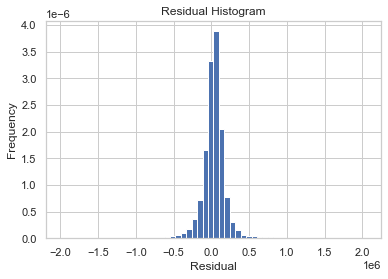

In [18]:
# Define and fit the model
price_model = smod.ols(formula = 'price ~ C(zipcode):grade:sqft_living - 1', 
                     data = houses_df)
results = price_model.fit()

# Print the SSE, SST, SSR, and MSE
price_mean = houses_df['price'].mean()
sst = np.sum((houses_df['price'] - price_mean)**2)
sse = sst - results.ssr
print('SSE: {:.2}'.format(sse))
print('SST: {:.2}'.format(sst))
print('SSR: {:.2}'.format(results.ssr))
print('RMSE: {:.2}'.format(np.sqrt(results.mse_model)))

print(results.summary()) # Print results summary

# Plot a histogram of the residuals
plt.hist(results.resid, density = True, bins = 'rice')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram');

The adjusted R-squared of 0.932 is excellent - this model explains 93% of the variance in the data. However, the root of the mean square error (RMSE) is large in comparison to the mean of the data, as are the residuals. This would suggest that our model is a poor fit. Either that, or there are some extreme outlier residuals.

Let's dive into this and see how the residuals compare to the original values by calculating the percent difference.

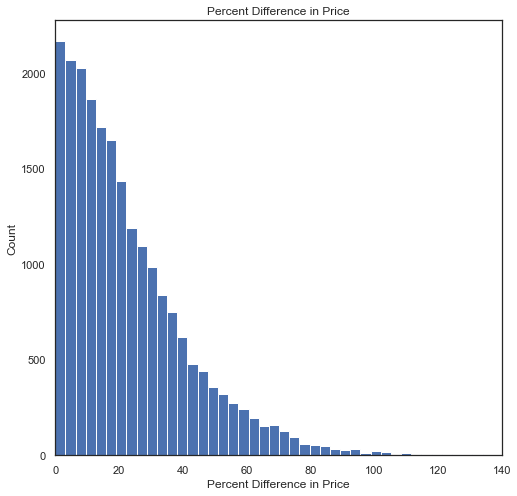

In [19]:
# Calculate the percent difference
perc_diff = 100 * 2 * (abs(houses_df['price'] - results.fittedvalues) / 
                       (houses_df['price'] + results.fittedvalues))

sns.set(style = 'white', color_codes = True)
ax = plt.figure(figsize = (8, 8)).gca() # Define axis

# Make and display the figure
plt.hist(x = perc_diff, bins = 'rice')
ax.set_title('Percent Difference in Price')
ax.set_xlim([0, 140])
ax.set_xlabel('Percent Difference in Price')
ax.set_ylabel('Count');

This is not great, but it is not nearly so bad as the RMSE and raw residuals would have us believe. Let's get the percentiles where we are off by factors of 1.1, 1.2, 1.5, and 2. A couple helper functions will ease this.

In [20]:
def percentile_perc_diff(data, factor):
    # Calculates the percentile of the data that exceeds a the percent
    # difference calculated from a certain factor.
    # Inputs: data - the data to take the percentile of
    #         factor - the factor from which to calculate the percent 
    #                  difference cutoff
    # Returns: percentile - the percent of the data below the calculated 
    #                       cutoff
    perc_diff = 100 * 2 * abs(factor - 1) / (factor + 1)
    return sps.percentileofscore(data, perc_diff)

In [21]:
# Get and print the percentiles
print('Percentile Difference below Factor of 1.1: {:.2}'.format(percentile_perc_diff(perc_diff, 1.1)))
print('Percentile Difference below Factor of 1.2: {:.2}'.format(percentile_perc_diff(perc_diff, 1.2)))
print('Percentile Difference below Factor of 1.5: {:.2}'.format(percentile_perc_diff(perc_diff, 1.5)))
print('Percentile Difference below Factor of 2: {:.2}'.format(percentile_perc_diff(perc_diff, 2)))

Percentile Difference below Factor of 1.1: 2.9e+01
Percentile Difference below Factor of 1.2: 5.1e+01
Percentile Difference below Factor of 1.5: 8.4e+01
Percentile Difference below Factor of 2: 9.6e+01


These values are good, but not excellent. We could do to improve our worst 4% of estimates, in which we are off by a factor of 2 or more.

### Naive Bayes

We used a Naive Bayes algorithm to try and better predict housing prices. This is emphatically not what Naive Bayes is designed for; it is a classifier - not a regressor. Thus, we will need to transform our target vector to be categorical. Let's define our feature matrix and target vector, and do that now.

In [22]:
# Define our feature matrix using ordinal encoding
X_ord_enc = OrdinalEncoder()
X = houses_df[['sqft_living_bin', 'zipcode', 'grade']]
X = X_ord_enc.fit_transform(X)

# Define our target vector
y_ord_enc = OrdinalEncoder()
y = np.array(pd.qcut(x = houses_df['price'], q = 10, precision = 0)).reshape(-1, 1)
y = y_ord_enc.fit_transform(y)

We have our data in the proper format, so let's split it into training and testing sets.

In [23]:
# Do a 80/20 train-test split with stratification and shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8, 
                                                    stratify = y)

We are now ready to define and fit the model to the training set.

In [24]:
cnb_clf = CategoricalNB() # Define the model
fit_cnb_clf = cnb_clf.fit(X_train, y_train.ravel()) # Fit the model

We can use the trained model for predictions on the testing set.

In [25]:
y_pred = fit_cnb_clf.predict(X_test) # Get predictions

And now, we can look at our confusion matrices and classification report to get some idea of how the model has performed.

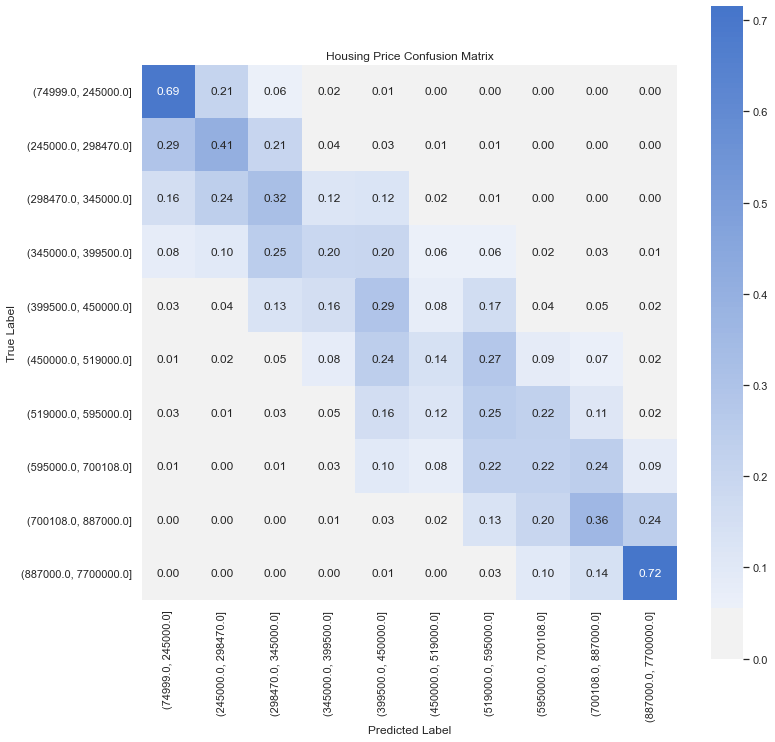

In [26]:
# Get the confusion matrix and normalize across true label
conf_mat = confusion_matrix(y_test, y_pred, normalize = 'true')

ax = plt.figure(figsize = (12, 12)).gca() # Define axis

# Plot the confusion matrix
cmap = sns.diverging_palette(255, 255, sep = 20, as_cmap = True)
sns.heatmap(data = conf_mat, 
            annot = True, fmt = '.2f',
            square = True, 
            cmap = cmap, center = 0, 
            ax = ax, 
            xticklabels = y_ord_enc.categories_[0], 
            yticklabels = y_ord_enc.categories_[0])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Housing Price Confusion Matrix');

This is not great if we judge or model as a classifier. Only in the most extreme cases is the classification correct. There is some promise in this model as a regressor, however. Looking a bit more closely, we see that the vast majority of the prediction lie either on the diagonal, or near it. This means that our jury-rigged Naive Bayes regressor is predicting prices that are at least somewhat close to the correct one.

This confusion matrix does mean that we can expect a rather dismal classification report, as the report assumes we are actually using the model for its intended purpose.

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.69      0.60       434
         1.0       0.39      0.41      0.40       431
         2.0       0.31      0.32      0.31       435
         3.0       0.27      0.20      0.23       430
         4.0       0.25      0.29      0.27       443
         5.0       0.27      0.14      0.19       423
         6.0       0.22      0.25      0.23       438
         7.0       0.24      0.22      0.23       425
         8.0       0.36      0.36      0.36       432
         9.0       0.65      0.72      0.68       432

    accuracy                           0.36      4323
   macro avg       0.35      0.36      0.35      4323
weighted avg       0.35      0.36      0.35      4323



This is about as bad as we would expect. The precision and recall are substantially better than the 0.10 we would expect from a random guess, but this does not look like an expert model.

## Making Predictive Models

We will be making and comparing three different predictive models for housing price. Based on our previous work with the Naive Bayes classifier, they will all be regressors.
1. Linear Model: We saw some glimmers of possibility with the linear model in milestone M03. We may be able to improve upon it to get better results. We will use the same features, but try different model parameters.
2. Random Forest: We may be able to extract better results using a random forest and using lat and long to encode our location features instead of zipcode.
3. k-Nearest Neighbors (kNN): The best predictor of a house's price may be the price of similar houses nearby. In such a case, a kNN regressor may be effective.

We will be using the same testing and training sets for each of these - even when the features are different. We will also judge them with the same metrics; the R squared, median absolute error, and percentiles of the percent difference where we are off by factors of 1.1, 1.2, 1.5, and 2.

### Splitting the Data

We will split the data with a simple shuffle split. The training set will contain 80% of the data, and the testing set the other 20%.

In [28]:
# Define the feature matrix and target vector
X = houses_df.drop('price', axis = 1)
y = houses_df['price']

# Get the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = RAND_SEED)

### Engineering Features

All three of our regressors require different feature sets, so we will need to engineer the training and testing sets beforehand.

#### Linear Model

Let's start by engineering features for the linear model. We will be using the same features as we did in milestone M03. These are most easily engineered with patsy. For reference, there are 70 such features - one for each zipcode - that consist of a house's grade multiplied by it's price if it is in that zipcode, and zero otherwise.

In [29]:
# Define the features
formula = 'grade:C(zipcode):sqft_living - 1'

# Transform the training and testing sets
lin_X_train = dmatrix(formula, data = X_train, return_type = 'dataframe')
lin_X_test = dmatrix(formula, data = X_test, return_type = 'dataframe')

#### Random Forest

The random forest model will use 16 features. 13 of the features will be one-hot encodings of grade, and the remaining three will be lat, long, and sqft_living.

In [30]:
# Define the features for use
features = ['grade', 'sqft_living', 'lat', 'long']

# Transform the training and testing sets
rf_X_train = pd.get_dummies(X_train[features], 
                            columns = ['grade'], drop_first = True)
rf_X_test = pd.get_dummies(X_test[features], 
                           columns = ['grade'], drop_first = True)

#### k-Nearest Neighbors

The kNN algorithm requires the most work. We will be using the same 16 features as the random forest, but we will be scaling lat, long, and sqft_living to avoid any one feature having undue influence.

In [31]:
# Define the features for use
features = ['grade', 'sqft_living', 'lat', 'long']

# One-hot encode grade
knn_X_train = pd.get_dummies(X_train[features], 
                             columns = ['grade'], drop_first = True)
knn_X_test = pd.get_dummies(X_test[features], 
                            columns = ['grade'], drop_first = True)

# Scale sqft_living, lat, and long
to_scale = ['sqft_living', 'lat', 'long']
scaler = RobustScaler()
scaler.fit(knn_X_train[to_scale])
knn_X_train[to_scale] = scaler.transform(knn_X_train[to_scale])
knn_X_test[to_scale] = scaler.transform(knn_X_test[to_scale])

### Defining and Training the Models

Now that we have defined our testing and training sets, we can make and train the models.

#### Linear Model

As before, we start with the linear model. The parameters and training process of this model are what differentiates it from the model in milestone M03. We will be using stochastic gradient descent for training, and the Huber loss instead of the squared loss. This should hopefully make it less sensitive to outliers.

In [32]:
# Define the linear model
lin_model = SGDRegressor(loss = 'huber', 
                         alpha = 0, 
                         fit_intercept = False,
                         random_state = RAND_SEED)

# Train the model on the training data
fit_lin_model = lin_model.fit(lin_X_train, y_train)

#### Random Forest

The random forest regressor will use the default parameters in scikit learn. For now, that means we will be creating a forest of 100 trees with variable depth.

In [33]:
# Define the random forest model
rf_model = RandomForestRegressor(n_jobs = -1, 
                                 random_state = RAND_SEED)

# Train the model on the training data
fit_rf_model = rf_model.fit(rf_X_train, y_train)

#### k-Nearest Neighbors

Finally, we define and train the kNN regressor. We will set k to 15, as the creators of the dataset seemed to think this a good amount. We will also be using the l1 metric for distance calculation due to the presence of the one-hot encoded grade features.

In [34]:
# Define the kNN model
knn_model = KNeighborsRegressor(n_neighbors = 15, 
                                p = 1, 
                                n_jobs = -1)

# Train the model on the training data
fit_knn_model = knn_model.fit(knn_X_train, y_train)

### Getting Predictions

We have trained our models, so now it is time to use them to predict the values of our testing set.

In [35]:
# Get predictions from all three models
lin_y_pred = pd.Series(fit_lin_model.predict(lin_X_test), name = 'price_pred')
rf_y_pred = pd.Series(fit_rf_model.predict(rf_X_test), name = 'price_pred')
knn_y_pred = pd.Series(fit_knn_model.predict(knn_X_test), name = 'price_pred')

### Evaluating Model Performance

We can use the predictions generated by the models to calculate evaluation metrics for each model. Our evaluation metrics of choice are:
1. The R Squared: The R squared provides a good estimate for how much of the data the model has explained. It is a generally useful for evaluating regression models.
2. The Median Absolute Error: The median absolute error gives us a simple absolute measure for how far off the model typically is.
3. Percentiles of Difference below a Given Factor: These metrics tell us exactly what percent of our predictions differ from the truth by more than the given factor. The percentile difference below the factor of 2, for instance, tells us what percent of our predictions differ from the truth by a factor of 2 or less (whether the prediction is less than twice the truth or more than half).

In [36]:
# Reset index of y_test to prevent issues with arithmatic
y_test = y_test.reset_index().drop('index', axis = 1).T.squeeze()

#### Linear Model

Let's start with the linear model.

R Squared: 0.73
Median Absolute Error: 7.7e+04
Percentile Difference below Factor of 1.1: 2.9e+01
Percentile Difference below Factor of 1.2: 5.1e+01
Percentile Difference below Factor of 1.5: 8.4e+01
Percentile Difference below Factor of 2: 9.6e+01


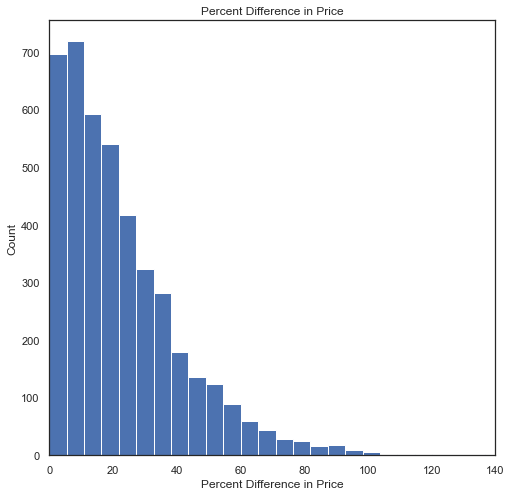

In [37]:
# Calculate and print the R squared
print('R Squared: {:.2}'.format(r2_score(y_test, lin_y_pred)))

# Calculate and print the median absolute error
print('Median Absolute Error: {:.2}'.format(median_absolute_error(y_test, lin_y_pred)))

# Calculate the percent difference
lin_perc_diff = 100 * 2 * (abs(y_test - lin_y_pred) / 
                          (y_test + lin_y_pred))

sns.set(style = 'white', color_codes = True)
ax = plt.figure(figsize = (8, 8)).gca() # Define axis

# Make and display the figure
plt.hist(x = lin_perc_diff, bins = 'rice')
ax.set_title('Percent Difference in Price')
ax.set_xlim([0, 140])
ax.set_xlabel('Percent Difference in Price')
ax.set_ylabel('Count');

# Get and print the percentiles
print('Percentile Difference below Factor of 1.1: {:.2}'.format(percentile_perc_diff(lin_perc_diff, 1.1)))
print('Percentile Difference below Factor of 1.2: {:.2}'.format(percentile_perc_diff(lin_perc_diff, 1.2)))
print('Percentile Difference below Factor of 1.5: {:.2}'.format(percentile_perc_diff(lin_perc_diff, 1.5)))
print('Percentile Difference below Factor of 2: {:.2}'.format(percentile_perc_diff(lin_perc_diff, 2)))

#### Random Forest

Now for the random forest.

R Squared: 0.8
Median Absolute Error: 4.6e+04
Percentile Difference below Factor of 1.1: 4.8e+01
Percentile Difference below Factor of 1.2: 7.2e+01
Percentile Difference below Factor of 1.5: 9.5e+01
Percentile Difference below Factor of 2: 9.9e+01


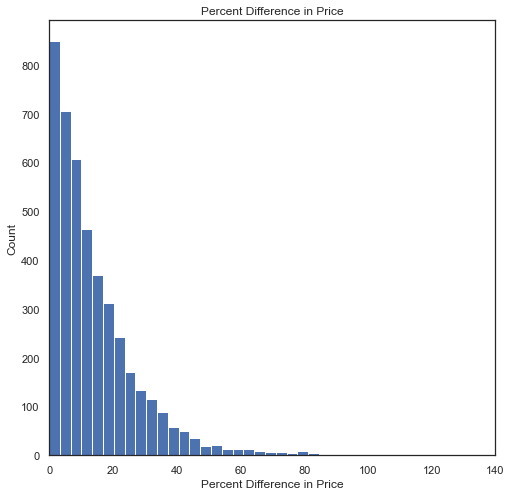

In [38]:
# Calculate and print the R squared
print('R Squared: {:.2}'.format(r2_score(y_test, rf_y_pred)))

# Calculate and print the median absolute error
print('Median Absolute Error: {:.2}'.format(median_absolute_error(y_test, rf_y_pred)))

# Calculate the percent difference
rf_perc_diff = 100 * 2 * (abs(y_test - rf_y_pred) / 
                          (y_test + rf_y_pred))

sns.set(style = 'white', color_codes = True)
ax = plt.figure(figsize = (8, 8)).gca() # Define axis

# Make and display the figure
plt.hist(x = rf_perc_diff, bins = 'rice')
ax.set_title('Percent Difference in Price')
ax.set_xlim([0, 140])
ax.set_xlabel('Percent Difference in Price')
ax.set_ylabel('Count');

# Get and print the percentiles
print('Percentile Difference below Factor of 1.1: {:.2}'.format(percentile_perc_diff(rf_perc_diff, 1.1)))
print('Percentile Difference below Factor of 1.2: {:.2}'.format(percentile_perc_diff(rf_perc_diff, 1.2)))
print('Percentile Difference below Factor of 1.5: {:.2}'.format(percentile_perc_diff(rf_perc_diff, 1.5)))
print('Percentile Difference below Factor of 2: {:.2}'.format(percentile_perc_diff(rf_perc_diff, 2)))

#### k-Nearest Neighbors

And finally, the kNN regressor.

R Squared: 0.8
Median Absolute Error: 4.6e+04
Percentile Difference below Factor of 1.1: 4.7e+01
Percentile Difference below Factor of 1.2: 7.2e+01
Percentile Difference below Factor of 1.5: 9.4e+01
Percentile Difference below Factor of 2: 9.9e+01


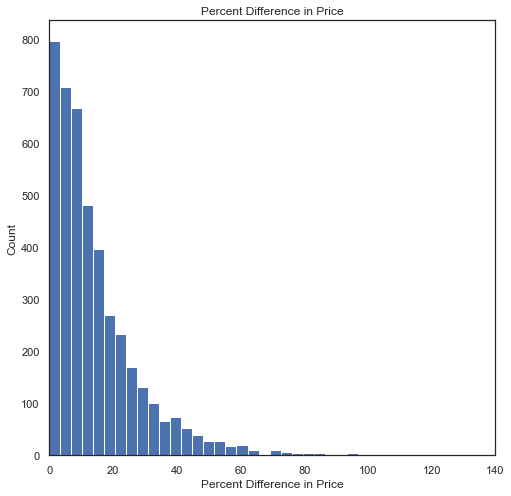

In [39]:
# Calculate and print the R squared
print('R Squared: {:.2}'.format(r2_score(y_test, knn_y_pred)))

# Calculate and print the median absolute error
print('Median Absolute Error: {:.2}'.format(median_absolute_error(y_test, knn_y_pred)))

# Calculate the percent difference
knn_perc_diff = 100 * 2 * (abs(y_test - knn_y_pred) / 
                          (y_test + knn_y_pred))

sns.set(style = 'white', color_codes = True)
ax = plt.figure(figsize = (8, 8)).gca() # Define axis

# Make and display the figure
plt.hist(x = knn_perc_diff, bins = 'rice')
ax.set_title('Percent Difference in Price')
ax.set_xlim([0, 140])
ax.set_xlabel('Percent Difference in Price')
ax.set_ylabel('Count');

# Get and print the percentiles
print('Percentile Difference below Factor of 1.1: {:.2}'.format(percentile_perc_diff(knn_perc_diff, 1.1)))
print('Percentile Difference below Factor of 1.2: {:.2}'.format(percentile_perc_diff(knn_perc_diff, 1.2)))
print('Percentile Difference below Factor of 1.5: {:.2}'.format(percentile_perc_diff(knn_perc_diff, 1.5)))
print('Percentile Difference below Factor of 2: {:.2}'.format(percentile_perc_diff(knn_perc_diff, 2)))

### Comparing Models

We have our evaluation metrics for each model, so let's compare them.

The linear model was the worst performer of the three. It had a lower R squared than the random forest and kNN models, and higher median absolute error and percent differences. The random forest and kNN models performed almost precisely the same, though the kNN model was faster to train. The random forest model does scale better, however, and modern gradient boosting methods may be able to improve performance while maintaining the great interpretability offered by trees.

The linear model performed very similarly to our initial linear model from milestone M03 with the exception of R squared - though that was probably much lower due to calculating it on a separate testing set. We can consider these two models as almost identical. The random forest and kNN models dramatically improved on the percentile metrics - being off by a factor of 2 in only ~1% of cases as opposed to ~4%. This improvement in the tail is fantastic. Beyond the tail, they are off by a factor greater than 1.2 only ~28% of the time. These models have dramatically tightened predictions.

## Summary

We have now done the following:
* Found features - living area, location, and grade - that are strongly related to housing price.
* Shown that those relationships are significant.
* Constructed a series of models that use those features, or variants of those features, to predict housing prices.
* Tested those models and compared them to each other.

After testing models, we have a clear champion: the random forest regressor. While it and the kNN regressor performed almost identically, the random forest regressor can scale better to our business needs, and modern versions of the algorithm could offer substantial performance improvements. As it is, this model offers predictions that differ from the truth by more than a factor of 1.2 less than 30% of the time - and more than 2 around 1% of the time.

We are not done just because we have a model that performs well. Here are our possible next steps:
* Switching to a more modern tree-based method like XGBoost.
* Diving deep in the cases at the tail end of our percent difference curves to find what information distinguishes them.
* Finding features that capture that information in a significant way and incorporating them into the model.
* Tuning model parameters and hyperparameters with cross-validation.
* Gathering more data.